Simple Implementation of Raw CNN

In [1]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) , (testing_images,testing_labels) = mnist.load_data()
training_images = training_images.reshape(60000, 28,28,1)
training_images = training_images / 255.0
testing_images = testing_images.reshape(10000, 28,28,1)
testing_images = testing_images / 255.0

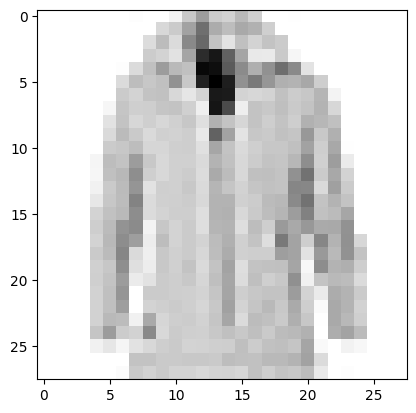

In [5]:
from matplotlib import pyplot as plt
for i in range(10,20) :
  plt.imshow(training_images[i][:, :, 0], cmap=plt.cm.binary)
  plt.show

Writing teh model (CNN) using Keras lib

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)) ,
    tf.keras.layers.MaxPool2D(2,2) ,
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2) ,
    tf.keras.layers.Flatten() ,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [9]:
model.fit(training_images,training_labels,epochs=5)
test_loss = model.evaluate(testing_images, testing_labels)

Epoch 1/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.4576 - accuracy: 0.8321
Epoch 2/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.3040 - accuracy: 0.8878
Epoch 3/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2580 - accuracy: 0.9040
Epoch 4/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2257 - accuracy: 0.9161
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.2456 - accuracy: 0.9085
